<a href="https://colab.research.google.com/github/yuki-hosoi-sp/ai-perfect-master/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなディープラーニング

## データの読み込み

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.target[:10])
print(iris.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


各行→あやめの花  
[花弁の幅、花弁の長さ、花びらの幅、花びらの長さ]
ラベル： 0→setosa 1→versicolor 2→versinica

## データの前処理

In [2]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler() # 標準化
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

t = np_utils.to_categorical(iris.target) # one-hot表現に変換
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


## 訓練データとテストデータに分割

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

In [21]:
print(x_train.shape)
print(x_test.shape)

(112, 4)
(38, 4)


## モデルの構築

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 全結合層： Dense(中間層の数, 入力数（今回は特徴量が4つなので4としている）)
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(3)) # 出力数は予測するアヤメの種類の3
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary()) # コンパイルされたモデルの概要を出力

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 activation_3 (Activation)   (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 activation_4 (Activation)   (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
 activation_5 (Activation)   (None, 3)                 0         
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-traina

Param = 32(neurons) * 4(features) + 32(biases)

## 学習

In [10]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0906 - accuracy: 0.4107
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9947 - accuracy: 0.5089
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9181 - accuracy: 0.6429
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8541 - accuracy: 0.8125
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7987 - accuracy: 0.8304
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.8214
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7054 - accuracy: 0.8304
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6669 - accuracy: 0.8393
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6326 - accuracy: 0.8393
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.8482
Epoch 11/30
14/14 [

## 学習の推移

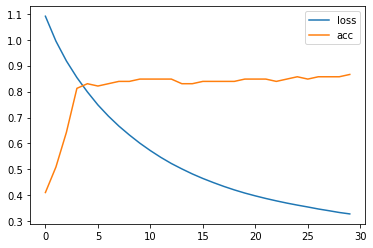

In [17]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']
hist_acc = history.history['accuracy']

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='acc')
plt.legend()
plt.show()

In [15]:
print(type(history))

<class 'keras.callbacks.History'>


## 評価

In [19]:
loss, accuracy = model.evaluate(x_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.3532 - accuracy: 0.8421
0.3531568646430969 0.8421052694320679


## 予測

In [25]:
model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


array([[0.07498054, 0.38763335, 0.5373861 ],
       [0.01887939, 0.11944041, 0.86168015],
       [0.01225667, 0.0731714 , 0.91457194],
       [0.14164098, 0.5048618 , 0.35349727],
       [0.08432894, 0.521252  , 0.39441907],
       [0.9617823 , 0.03046834, 0.00774943],
       [0.02034128, 0.12565765, 0.85400105],
       [0.9786027 , 0.01537336, 0.00602389],
       [0.02815339, 0.18460926, 0.7872373 ],
       [0.02110702, 0.15549468, 0.8233984 ],
       [0.03044494, 0.20195478, 0.76760024],
       [0.08675837, 0.62754565, 0.28569594],
       [0.9871285 , 0.00616132, 0.00671022],
       [0.01934585, 0.10964186, 0.8710123 ],
       [0.07854395, 0.45036167, 0.47109425],
       [0.97861075, 0.01366475, 0.00772441],
       [0.06245793, 0.7792658 , 0.15827632],
       [0.06194879, 0.7875936 , 0.15045759],
       [0.9523727 , 0.02992209, 0.01770524],
       [0.14217605, 0.5673039 , 0.29052007],
       [0.02720232, 0.1529507 , 0.819847  ],
       [0.9621252 , 0.02506652, 0.0128083 ],
       [0.

In [24]:
t_test.shape

(38, 3)

## 学習済みモデルの保存

In [26]:
from keras.models import load_model

model.save('model.h5') # 保存
load_model('model.h5') # 読み込み